Import libraries

In [1]:
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, Activation
from tensorflow.contrib.keras.python.keras.optimizers import RMSprop, Adam
from tensorflow.contrib.keras.python.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

Load dataset

In [2]:
trainingset = np.loadtxt('../datasets/fer2013/fer2013_training_onehot.csv', delimiter=',')
testingset = np.loadtxt('../datasets/fer2013/fer2013_publictest_onehot.csv', delimiter=',')

Split data

In [3]:
n_inputs = 2304
n_classes = 7
img_dim = 48

x_training = trainingset[:, 0:n_inputs]
y_training = trainingset[:, n_inputs:n_inputs + n_classes]

x_testing = testingset[:, 0:n_inputs]
y_testing = testingset[:, n_inputs:n_inputs + n_classes]

x_training = x_training.reshape(x_training.shape[0], 48, 48)
x_training = np.expand_dims(x_training, axis=4)

x_testing = x_testing.reshape(x_testing.shape[0], 48, 48)
x_testing = np.expand_dims(x_testing, axis=4)

In [4]:
def get_emotion(ohv):
    indx = np.argmax(ohv)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48, 1)
(28709, 7)
(3589, 48, 48, 1)
(3589, 7)


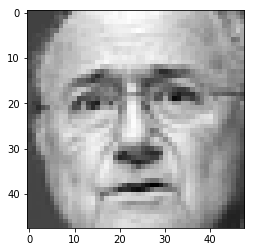

facial emotion: fear


In [5]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sample = x_training[5, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[5, :]))

Define model: a model in karas is a sequence of layers!

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape = (48, 48, 1)))

In [8]:
model.add(Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [10]:
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

In [11]:
model.add(Conv2D(128, (3, 3), activation='relu'))

In [12]:
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

In [13]:
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

In [14]:
model.add(Conv2D(256, (3, 3), activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [16]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

Compile model

In [17]:
opt = Adam(lr=0.0001, decay=10e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Fit model

In [18]:
batch_size = 128
n_epoches = 500
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

model.fit(x_training, y_training, batch_size=batch_size, epochs=n_epoches,
          validation_data=(x_testing, y_testing), shuffle=True,
          callbacks=[early_stopping])

Train on 28709 samples, validate on 3589 samples
Epoch 1/500
28709/28709 [==============================] - 28s - loss: 2.4209 - acc: 0.2725 - val_loss: 1.6136 - val_acc: 0.3873
Epoch 2/500
28709/28709 [==============================] - 25s - loss: 1.5547 - acc: 0.4008 - val_loss: 1.4224 - val_acc: 0.4533
Epoch 3/500
28709/28709 [==============================] - 25s - loss: 1.4144 - acc: 0.4598 - val_loss: 1.3566 - val_acc: 0.4801
Epoch 4/500
28709/28709 [==============================] - 25s - loss: 1.3090 - acc: 0.5075 - val_loss: 1.2520 - val_acc: 0.5227
Epoch 5/500
28709/28709 [==============================] - 25s - loss: 1.2144 - acc: 0.5448 - val_loss: 1.2051 - val_acc: 0.5478
Epoch 6/500
28709/28709 [==============================] - 25s - loss: 1.1370 - acc: 0.5768 - val_loss: 1.1716 - val_acc: 0.5598
Epoch 7/500
28709/28709 [==============================] - 25s - loss: 1.0451 - acc: 0.6135 - val_loss: 1.1462 - val_acc: 0.5687
Epoch 8/500
28709/28709 [=======================

Evaluate model

In [19]:
scores = model.evaluate(x_testing, y_testing)
print('%s: %.2f%%'% (model.metrics_names[1], scores[1]*100))

3552/3589 [============================>.] - ETA: 0sacc: 60.55%
